# Amazon Fine Foods review: TSNE Exercise

In [1]:
#Import section
import numpy as np
import pandas as pd
import sqlite3
import string
import nltk


In [2]:
c=sqlite3.connect('G:\ML\Data_Sets\Amazon\database.sqlite')

In [3]:
filtered_data=pd.read_sql_query(""" select * from reviews where score!=3 """,c)


In [4]:
#Converting scores to Positive or negative

def partition(x):
    if x<3:
        return 'negative'
    else:
        return 'positive'
    
tmp=filtered_data['Score']
new=tmp.map(partition)
new.head()
filtered_data['Score']=new

In [5]:
filtered_data.shape

(525814, 10)

# Data Preprocessing

# Data Deduplication

In [6]:
d=pd.read_sql_query(""" 
select * 
from reviews
where score!=3 and UserId= 'AR5J8UI46CURR'
""",c)
d.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,73791,B000HDOPZG,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
1,78445,B000HDL1RQ,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
2,138277,B000HDOPYM,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
3,138317,B000HDOPYC,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...
4,155049,B000PAQ75C,AR5J8UI46CURR,Geetha Krishnan,2,2,5,1199577600,LOACKER QUADRATINI VANILLA WAFERS,DELICIOUS WAFERS. I FIND THAT EUROPEAN WAFERS ...


In [7]:
sorted_data=filtered_data.sort_values('ProductId',ascending= True,axis=0,na_position='last',inplace=False)

In [8]:
dedup_data=sorted_data.drop_duplicates(subset={"UserId",'ProfileName','Time','Text'},keep='first', inplace= False)
fin_data=dedup_data
dedup_data.shape

(364173, 10)

In [9]:
dedup_data=dedup_data[dedup_data.HelpfulnessNumerator <= dedup_data.HelpfulnessDenominator]
dedup_data.shape

(364171, 10)

In [ ]:
conn=sqlite3.connect('G:\ML\Data_Sets\Amazon\clean_data.sqlite')
c=conn.cursor()
conn.text_factory=str
dedup_data.to_sql('Reviews',if_exists='replace',index=True, index_label=None, chunksize=None, dtype=None)

# Text preprocessing

In [10]:
#Funcns for clean HTML & Punc

import re

def cleanHtml(s):
    clean=re.compile('<.*?>')
    cleared= re.sub(clean,' ',s)
    return cleared

def cleanPunc(s):
    cleared=re.sub('[?|!|\'|"|(|)|.|#|]',r' ',s)
    return cleared



In [11]:
#Stem 

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))
sno=nltk.stem.SnowballStemmer('english')

print(sno.stem('Tasty'))

tasti


In [12]:
#Program to clean the words

import time
i=0 #Review counter
str=''
filtered_text=[]
pos_words=[]
neg_words=[]
start=time.time()
print('Operation started at : {} '.format(start))
for sentence in dedup_data['Text'].values:
    filtered_sentence=[]
    clean=cleanHtml(sentence)
    clean=cleanPunc(clean)
    for words in clean.split():
        #print(type(words))
        if(len(words)>2 and words.isalpha()):
            stem=(sno.stem(words.lower()))
            filtered_sentence.append(stem)
            if (dedup_data['Score'].values)[i]=='positive':
                pos_words.append(stem)
            if (dedup_data['Score'].values)[i]=='negative':
                neg_words.append(stem)
            
        else:
            continue
            
    str1=' '.join(filtered_sentence)
    filtered_text.append(str1)
    i+=1
    #print('{} reviews completed'.format(i))

dedup_data['New']=filtered_text
end=time.time()-start
print('Time taken = {} '.format(end))


Operation started at : 1535894028.5856168 
Time taken = 1941.750880241394 


C:\Users\Sanat\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
dedup_data.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,this witti littl book make son laugh loud reci...
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read these sendak and watch the realli ro...
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,this fun way for children learn their month th...
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,this great littl book read has nice rhythm wel...
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,this book poetri about the month the year goe ...


In [15]:
#Exporting to SQL Lite

conn=sqlite3.connect('G:\ML\Data_Sets\Amazon\Final1_DB.sqlite')
conn.text_factory=str
dedup_data.to_sql('Reviews',conn, schema=None, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None)

# Creating Subset of data with 3k points from each class:

In [17]:
g=dedup_data.groupby('Score')
a=g.get_group('positive').sample(3000)
a.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,New
299069,323958,B005JRMUIY,A3TUSOAWOO2G0Q,K. Beal,0,1,positive,1336521600,The Best Flavor!,The Simply Bar is a great on-the-run thing to ...,the simpli bar great thing eat has ampl amount...
42234,45956,B0012ZQPWY,A3F4079MFPO2EQ,cjer504,0,0,positive,1334275200,one of the greatest,This sauce is awesome. It is on the sweeter si...,this sauc awesom the sweeter side the but defi...
140165,152112,B000N8N7K4,A3Q7C0V12LS2WF,"L. Muir ""Kubda""",1,1,positive,1317254400,WONDERFUL,Good value for this. I intend to use it all.<...,good valu for this intend use all tsp hot wate...


In [18]:
b=g.get_group('negative').sample(3000)
new_data=a.append(b,ignore_index= True)
new_data.shape

(6000, 11)

In [19]:
label=new_data['Score']
label.shape

(6000,)

# tSNE representation of Bag of Words:

In [20]:
BOW=cv.fit_transform(new_data['New'].values)
print('Shape of BOW :',BOW.get_shape())
print('No of Dim:',BOW.get_shape()[1])

Shape of BOW : (6000, 10280)
No of Dim: 10280


In [28]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(with_mean=False)
scaled_BOW= scaler.fit_transform(BOW)

In [32]:
from sklearn.manifold import TSNE
model=TSNE(n_components=2,random_state=0)
t_BOW= model.fit_transform(scaled_BOW.toarray())

In [33]:
t_BOW.shape

(6000, 2)

In [39]:
fin_BOW=np.vstack((t_BOW.T,label)).T
BOW_df=pd.DataFrame(fin_BOW,columns=('v1','v2','Labels'))
BOW_df.head()

,v1,v2,Labels
0,34.4299,36.1223,positive
1,-46.2958,-27.7618,positive
2,94.4711,30.7249,positive
3,46.405,38.5322,positive
4,-3.52466,1.40569,positive


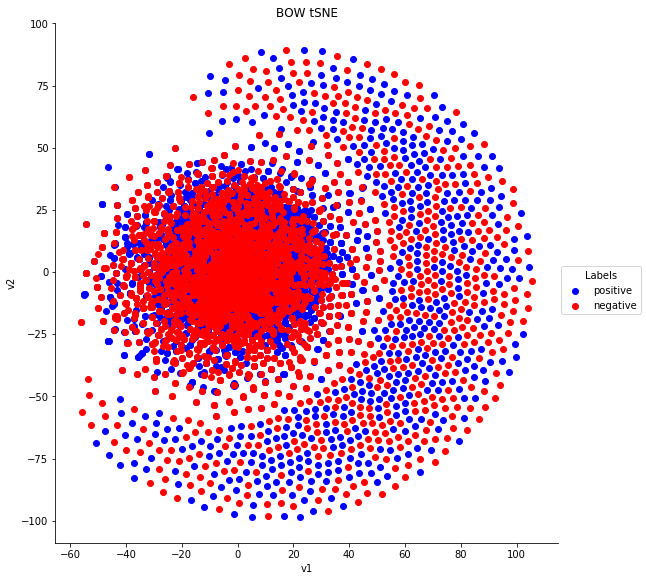

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(BOW_df,hue='Labels',palette=['b','r'],size=8).map(plt.scatter,'v1','v2').add_legend()
plt.title('BOW tSNE')
plt.show()

# tSNE implementation of tf-IDF :

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

ti=TfidfVectorizer()
ti_data=ti.fit_transform(new_data['New'].values)
ti_data.shape

(6000, 10280)

In [51]:
# Column Standardisation
std_ti=scaler.fit_transform(ti_data)

In [53]:
m1=TSNE(n_components=2,random_state=1,verbose=2,perplexity=60)
t_tfidf=m1.fit_transform(std_ti.todense())

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 6000 samples in 18.953s...
[t-SNE] Computed neighbors for 6000 samples in 1711.391s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 12.516206
[t-SNE] Computed conditional probabilities in 10.015s
[t-SNE] Iteration 50: error = 127.9227295, gradient norm = 0.2969297 (50 iterations in 68.846s)
[t-SNE] Iteration 100: error = 129.0011444, gradient norm = 0.2925230 (50 iterations in 46.923s)
[t-SNE] Iteration 150: error = 126.6063843, gradient norm = 0.2258634 (50 iterations in 64.832s)
[t-SNE] Iteration 200: error = 130.2448425, gradient norm = 0.2341719 (50 iterations

In [57]:
print(t_tfidf.shape)
final_tfidf=np.vstack((t_tfidf.T,label)).T
print(final_tfidf.shape)

(6000, 2)
(6000, 3)


In [58]:
tfidf_df=pd.DataFrame(final_tfidf,columns=('v1','v2','Labels'))
tfidf_df.head(3)

,v1,v2,Labels
0,-16.5005,-16.0195,positive
1,8.08726,12.6562,positive
2,-0.474776,-1.43325,positive


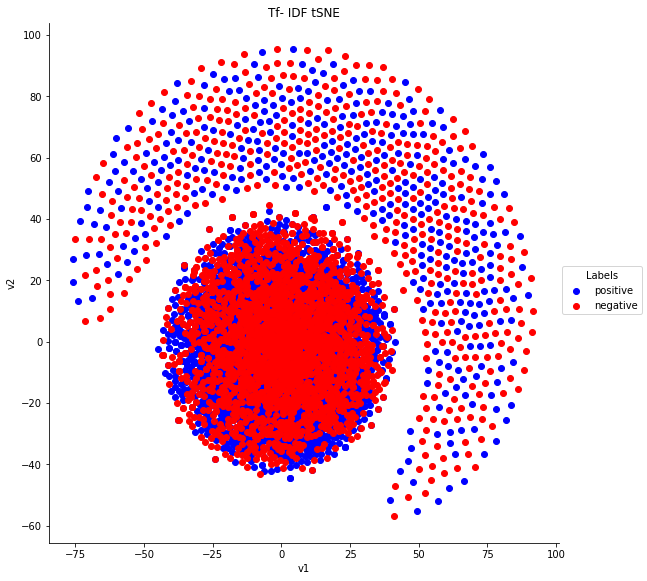

In [125]:
sns.FacetGrid(tfidf_df,hue='Labels',palette=['b','r'],size=8).map(plt.scatter,'v1','v2').add_legend()
plt.title('Tf- IDF tSNE')
plt.show()

# Word2Vec:

In [61]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [62]:
#Training W2V from my corpus

sentence_list=[]
for sent in new_data['New'].values:
    sentence_list.append(sent.split())

In [66]:
print(new_data['New'][50])
print('*********************************************')
print(sentence_list[50])

like the bob red mill unsweeten coconut the larger flake and work well bake oatmeal the morn like the unsweeten coconut are tri watch our sugar besid coconut sweet who need sugar price was good well
*********************************************
['like', 'the', 'bob', 'red', 'mill', 'unsweeten', 'coconut', 'the', 'larger', 'flake', 'and', 'work', 'well', 'bake', 'oatmeal', 'the', 'morn', 'like', 'the', 'unsweeten', 'coconut', 'are', 'tri', 'watch', 'our', 'sugar', 'besid', 'coconut', 'sweet', 'who', 'need', 'sugar', 'price', 'was', 'good', 'well']


In [89]:
w2v_mod=Word2Vec(sentence_list,size=50,workers=4)

In [71]:
type(w2v_mod)

gensim.models.word2vec.Word2Vec

In [86]:
W2V=list(w2v_mod.wv.vocab)

In [87]:
print('No of words in W2V {}'.format(len(W2V)))

No of words in W2V 6081


# Average W2V:

In [105]:

sent_vect=[]
for sentence in sentence_list:
    s_v=np.zeros(50)
    count=0
    for words in sentence:
        try:
            tmp=w2v_mod.wv[words]
            s_v+=tmp
            count+=1
        except:
            continue
    if count!=0:
        s_v/=count
    sent_vect.append(s_v)
print(sent_vect)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [109]:
std_avg = scaler.fit_transform(sent_vect)

In [111]:
t_avg=m1.fit_transform(std_avg)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.064s...
[t-SNE] Computed neighbors for 6000 samples in 15.896s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.743141
[t-SNE] Computed conditional probabilities in 1.886s
[t-SNE] Iteration 50: error = 81.4868469, gradient norm = 0.0000039 (50 iterations in 50.382s)
[t-SNE] Iteration 100: error = 81.4761963, gradient norm = 0.0014622 (50 iterations in 57.318s)
[t-SNE] Iteration 150: error = 80.4921265, gradient norm = 0.0000410 (50 iterations in 58.628s)
[t-SNE] Iteration 200: error = 80.4884033, gradient norm = 0.0000037 (50 iterations in 47.57

In [112]:
t_avg.shape

(6000, 2)

In [116]:
final_avgw2v=np.vstack((t_avg.T,label)).T
final_avgw2v.shape
tfidf_w2v=pd.DataFrame(final_avgw2v,columns=('v1','v2','Labels'))
tfidf_w2v.head(3)

,v1,v2,Labels
0,34.6972,28.1338,positive
1,-1.07206,9.93056,positive
2,13.5429,46.9492,positive


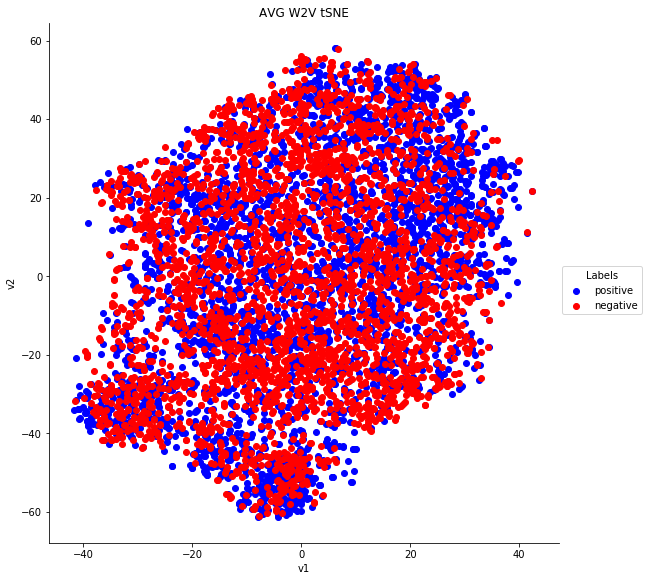

In [126]:
sns.FacetGrid(tfidf_w2v,hue='Labels',palette=['b','r'],size=8).map(plt.scatter,'v1','v2').add_legend()
plt.title('AVG W2V tSNE')
plt.show()

# tSNE representation of TfIdf- Word2Vec

In [115]:
feats=ti.get_feature_names()

row=0
tf_sv=[]
for sentence in sentence_list:
    s_v=np.zeros(50)
    weight=0
    for word in sentence:
        try:
            vec=w2v_mod.wv[word]
            tf=ti_data[row,feats.index(word)]
            s_v+=(vec*tf)
            weight+=tf
        except:
            continue
    if weight!=0:
        s_v/=weight
    tf_sv.append(s_v)   
    row+=1
            
        

In [118]:
std_tfidf = scaler.fit_transform(tf_sv)

In [119]:
t_tfidf_w2v=m1.fit_transform(std_tfidf)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.067s...
[t-SNE] Computed neighbors for 6000 samples in 15.572s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.691331
[t-SNE] Computed conditional probabilities in 1.881s
[t-SNE] Iteration 50: error = 82.0736923, gradient norm = 0.0001541 (50 iterations in 54.297s)
[t-SNE] Iteration 100: error = 80.2989273, gradient norm = 0.0001286 (50 iterations in 55.020s)
[t-SNE] Iteration 150: error = 80.2856369, gradient norm = 0.0000149 (50 iterations in 49.062s)
[t-SNE] Iteration 200: error = 80.2837982, gradient norm = 0.0000127 (50 iterations in 49.47

In [120]:
final_tfidfw2v=np.vstack((t_tfidf_w2v.T,label)).T
final_tfidfw2v.shape

(6000, 3)

In [122]:
final_df=pd.DataFrame(final_tfidfw2v,columns=('v1','v2','Labels'))
final_df.head(3)

,v1,v2,Labels
0,41.7628,-1.26614,positive
1,-19.0389,7.2239,positive
2,22.4964,38.9129,positive


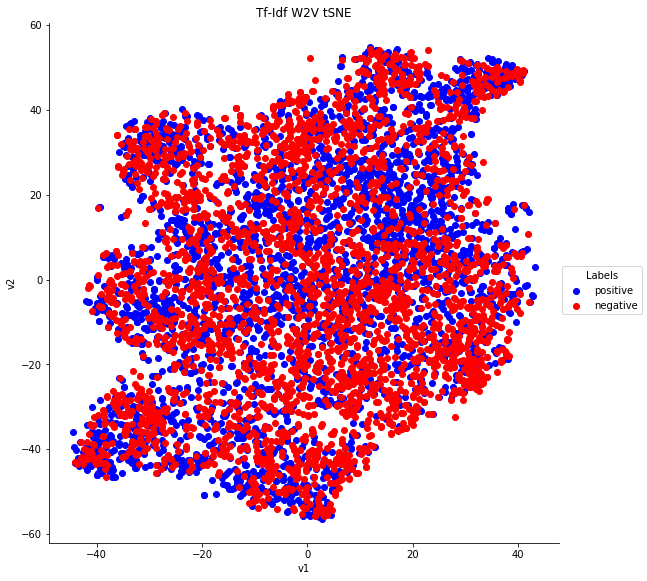

In [127]:
sns.FacetGrid(final_df,hue='Labels',palette=['b','r'],size=8).map(plt.scatter,'v1','v2').add_legend()
plt.title('Tf-Idf W2V tSNE')
plt.show()